In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import copy 
import pickle

import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table, Column, vstack, join

import palettable

cmap_1 = palettable.colorbrewer.sequential.Blues_7_r
cmap_2 = palettable.colorbrewer.sequential.OrRd_7_r
cmap_3 = palettable.colorbrewer.sequential.YlGn_7_r
cmap_4 = palettable.colorbrewer.sequential.Purples_7_r

cmap_list = [cmap_1, cmap_2, cmap_3, cmap_4]

color_bins = ["#377eb8", "#e41a1c", "#1b9e77", "#984ea3"]

In [2]:
import jianbing

from jianbing import hsc
from jianbing import utils
from jianbing import visual
from jianbing import catalog

In [3]:
data_dir = jianbing.DATA_DIR

fig_dir = jianbing.FIG_DIR

sim_dir = jianbing.SIM_DIR
bin_dir = jianbing.BIN_DIR
res_dir = jianbing.RES_DIR

### Scatter trends for different halo mass proxies

- Test different aperture stellar masses and outerskirt stellar masses

In [5]:
topn_massive = pickle.load(
    open(os.path.join(res_dir, 'topn_galaxies_sum.pkl'), 'rb'))

topn_cluster = pickle.load(
    open(os.path.join(res_dir, 'topn_clusters_cen_sum.pkl'), 'rb'))

In [7]:
# First group
cmod_bins = topn_massive['logm_cmod']
m100_bins = topn_massive['logm_100']
asap_bins = topn_massive['logmh_vir_symbol']
mout_bins = topn_massive['logm_50_100']

redm_bins = topn_cluster['redm_hsc_lambda']
cam_bins = topn_cluster['cam_s16a_n_mem']

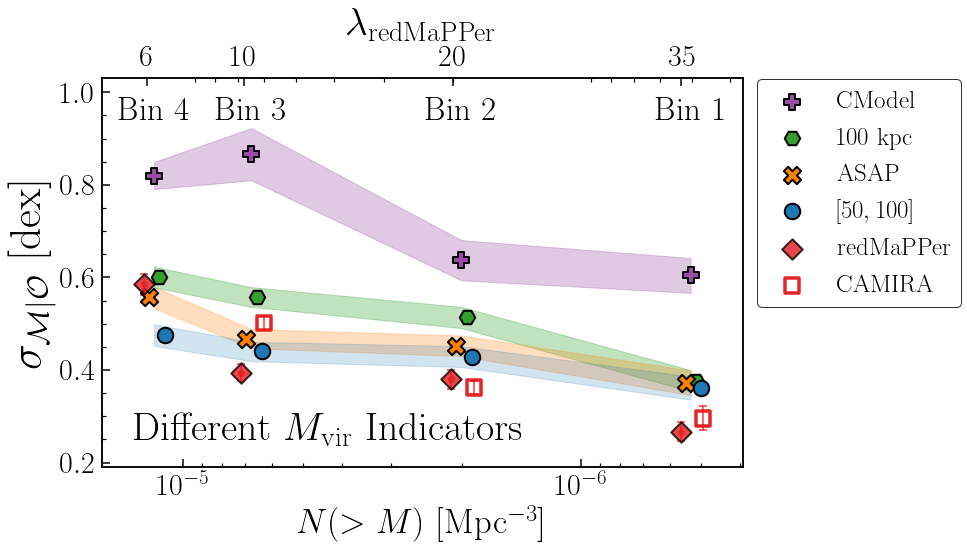

In [21]:
fig = plt.figure(figsize=(13.9, 7.5))
fig.subplots_adjust(left=0.12, right=0.76, bottom=0.14, top=0.86,
                    wspace=0.00, hspace=0.00)

# ----- Summary Plot ----- #
ax1 = fig.add_subplot(111)
ax1.set_xscale("log", nonpositive='clip')
ax1.grid(False)

colors = ['#984ea3', '#33a02c', '#ff7f00', '#1f78b4', '#e41a1c']

# CModel Stellar Mass
ax1.fill_between(
    m100_bins['rho_bin'], cmod_bins['sig_med_bt'] - cmod_bins['sig_err_bt'],
    cmod_bins['sig_med_bt'] + cmod_bins['sig_err_bt'], 
    color=colors[0], alpha=0.3
)

# M150 
ax1.fill_between(
    m100_bins['rho_bin'], m100_bins['sig_med_bt'] - m100_bins['sig_err_bt'],
    m100_bins['sig_med_bt'] + m100_bins['sig_err_bt'], 
    color=colors[1], alpha=0.3
)

# ASAP
ax1.fill_between(
    m100_bins['rho_bin'], asap_bins['sig_med_bt'] - asap_bins['sig_err_bt'],
    asap_bins['sig_med_bt'] + asap_bins['sig_err_bt'], 
    color=colors[2], alpha=0.25
)


# Outer Stellar Mass
ax1.fill_between(
    m100_bins['rho_bin'], mout_bins['sig_med_bt'] - mout_bins['sig_err_bt'],
    mout_bins['sig_med_bt'] + mout_bins['sig_err_bt'], 
    color=colors[3], alpha=0.20
)

ax1.scatter(m100_bins['rho_bin'], cmod_bins['sig_med_bt'], 
            s=250, marker='P', alpha=1.0, facecolor=colors[0], edgecolor='k', 
            linewidth=2.0, label=r'$\rm CModel$')

ax1.scatter(m100_bins['rho_bin'] * 0.97, m100_bins['sig_med_bt'], 
            s=240, marker='H', alpha=1.0, facecolor=colors[1], edgecolor='k', 
            linewidth=2.0, label=r'$100\ \rm kpc$')

ax1.scatter(m100_bins['rho_bin'] * 1.03, asap_bins['sig_med_bt'], 
            s=300, marker='X', alpha=1.0, facecolor=colors[2], edgecolor='k', 
            linewidth=2.0, label=r'$\rm ASAP$')

ax1.scatter(m100_bins['rho_bin'] * 0.94, mout_bins['sig_med_bt'], 
            s=240, marker='o', alpha=1.0, facecolor=colors[3], edgecolor='k', 
            linewidth=2.0, label=r'$[50,100]$')

# redMaPPer
ax1.errorbar(m100_bins['rho_bin'] * 1.06, redm_bins['sig_med_bt'], 
             yerr=redm_bins['sig_err_bt'], ecolor='red', color=colors[4], alpha=0.6, 
             capsize=4, capthick=2.0, elinewidth=2.0, label='__no_label__', fmt='o', zorder=0)

ax1.scatter(m100_bins['rho_bin'] * 1.06, redm_bins['sig_med_bt'], 
            s=210, marker='D', alpha=0.8, facecolor=colors[4], edgecolor='k', 
            linewidth=2.0, label=r'$\rm redMaPPer$')

# CAMIRA
ax1.errorbar(m100_bins['rho_bin'][:-1] * 0.93, cam_bins['sig_med_bt'][:-1], 
             yerr=cam_bins['sig_err_bt'][:-1], ecolor='red', color=colors[4], alpha=0.6, markersize=0,
             capsize=4, capthick=2.0, elinewidth=2.0, label='__no_label__', fmt='o', zorder=0)
ax1.scatter(m100_bins['rho_bin'][:-1] * 0.93, cam_bins['sig_med_bt'][:-1], 
            s=210, marker='s', alpha=0.95, facecolor='none', edgecolor=colors[4], 
            linewidth=3.5, label=r'$\rm CAMIRA$')

ax1.legend(bbox_to_anchor=(1.36, 1.03), ncol=1, bbox_transform=ax1.transAxes, fontsize=25, edgecolor='k')
ax1.text(0.05, 0.07, r'${\rm Different}\ M_{\rm vir}\ \rm Indicators$', fontsize=40, transform=ax1.transAxes)

ax1.text(m100_bins['rho_bin'][0], 0.94, r'$\rm Bin\ 1$', fontsize=33, horizontalalignment='center')
ax1.text(m100_bins['rho_bin'][1], 0.94, r'$\rm Bin\ 2$', fontsize=33, horizontalalignment='center')
ax1.text(m100_bins['rho_bin'][2], 0.94, r'$\rm Bin\ 3$', fontsize=33, horizontalalignment='center')
ax1.text(m100_bins['rho_bin'][3], 0.94, r'$\rm Bin\ 4$', fontsize=33, horizontalalignment='center')

ax1.set_xlim(np.max(m100_bins['rho_bin']) * 1.35, np.min(m100_bins['rho_bin']) * 0.74)
ax1.set_ylim(0.19, 1.03)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

# Secondary axis on top
ax_top = ax1.twiny()
ax_top.grid(False)
ax_top.set_xscale("log", nonpositive='clip')
ax_top.set_xlim(np.max(m100_bins['rho_bin']) * 1.3, np.min(m100_bins['rho_bin']) * 0.7)
ax_top.set_xticks(list(m100_bins['rho_bin']))
ax_top.set_xticklabels([r'${:d}$'.format(l) for l in [35, 20, 10, 6]], fontsize=30)
_ = ax_top.set_xlabel(r'$\lambda_{\rm redMaPPer}$', fontsize=40, labelpad=10)

_ = ax1.set_ylabel(r'$\sigma_{\mathcal{M}|\mathcal{O}}\ [\rm dex]$', fontsize=44)
_ = ax1.set_xlabel(r'$N (>M)\ [\rm Mpc^{-3}]$', fontsize=35)

In [22]:
fig.savefig(os.path.join(fig_dir, 'fig_8.png'), dpi=120)
fig.savefig(os.path.join(fig_dir, 'fig_8.pdf'), dpi=120)